## Mock Practical Exam

## Importing libraries

In [276]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [277]:
data = pd.read_csv("./Datasets/Breast_Cancer.csv")
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [278]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Getting information about data.

In [279]:
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [280]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [281]:
data['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [282]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [284]:
data['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

In [285]:
data['Marital Status'].value_counts()

Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64

In [286]:
data['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [287]:
data['T Stage '].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

In [288]:
data['differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

In [289]:
data['Grade'].value_counts()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [290]:
data['A Stage'].value_counts()

Regional    3932
Distant       92
Name: A Stage, dtype: int64

In [291]:
data['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

In [292]:
data['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

In [293]:
data['Estrogen Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64

## Data Preprocessing

In [294]:
def race_convert(var):
    if var == "White":
        return 0
    elif var == "Black":
        return 1
    else:
        return 2

def marital_status_convert(var):
    if var == "Married":
        return 0
    elif var == "Single":
        return 1
    elif var == "Divorced":
        return 2
    elif var == "Widowed":
        return 3
    else:
        return 4

def t_stage_convert(var):
    if var == "T1":
        return 0
    elif var == "T2":
        return 1
    elif var == "T3":
        return 2
    elif var == "T4":
        return 3
    
def n_stage_convert(var):
    if var == "N1":
        return 0
    elif var == "N2":
        return 1
    elif var == "N3":
        return 2

def a_stage_convert(var):
    if var == "Regional":
        return 0
    elif var == "Distant":
        return 1

def estrogen_status(var):
    if var == "Positive":
        return 0
    elif var == "Negative":
        return 1

def grade_convert(var):
    if var == "1":
        return 0
    elif var == "2":
        return 1
    elif var == "3":
        return 2
    elif var == " anaplastic; Grade IV":
        return 3

def sixth_stage_convert(var):
    if var == "IIA":
        return 0
    elif var == "IIB":
        return 1
    elif var == "IIIA":
        return 2
    elif var == "IIIB":
        return 3
    elif var == "IIIC":
        return 3

def differentiate_convert(var):
    if var == "Moderately differentiated":
        return 0
    elif var == "Poorly differentiated":
        return 1
    elif var == "Well differentiated":
        return 2
    elif var == "Undifferentiated":
        return 3

def progesterone_status_convert(var):
    if var == "Positive":
        return 0
    elif var == "Negative":
        return 1

def status_convert(var):
    if var == "Alive":
        return 0
    elif var == "Dead":
        return 1

In [295]:
data['Race'] = data['Race'].apply(race_convert)
data['Marital Status'] = data['Marital Status'].apply(marital_status_convert)
data['T Stage '] = data['T Stage '].apply(t_stage_convert)
data['N Stage'] = data['N Stage'].apply(n_stage_convert)
data['A Stage'] = data['A Stage'].apply(a_stage_convert)
data['Estrogen Status'] = data['Estrogen Status'].apply(estrogen_status)
data['Grade'] = data['Grade'].apply(grade_convert)
data['6th Stage'] = data['6th Stage'].apply(sixth_stage_convert)
data['differentiate'] = data['differentiate'].apply(differentiate_convert)
data['Progesterone Status'] = data['Progesterone Status'].apply(progesterone_status_convert)
data['Status'] = data['Status'].apply(status_convert)

In [296]:
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,0,0,0,0,0,1,2,0,4,0,0,24,1,60,0
1,50,0,0,1,1,2,0,1,0,35,0,0,14,5,62,0
2,58,0,2,2,2,3,0,1,0,63,0,0,14,7,75,0
3,58,0,0,0,0,0,1,2,0,18,0,0,2,1,84,0
4,47,0,0,1,0,1,1,2,0,41,0,0,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,0,0,0,0,0,1,0,9,0,0,1,1,49,0
4020,56,0,2,1,1,2,0,1,0,46,0,0,14,8,69,0
4021,68,0,0,1,0,1,0,1,0,22,0,1,11,3,69,0
4022,58,1,2,1,0,1,0,1,0,44,0,0,11,1,72,0


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   differentiate           4024 non-null   int64
 7   Grade                   4024 non-null   int64
 8   A Stage                 4024 non-null   int64
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int64
 11  Progesterone Status     4024 non-null   int64
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

In [298]:
data.describe()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,0.231362,1.072813,0.784791,0.438370,1.204523,0.560139,1.150596,0.022863,30.473658,0.066849,0.173459,14.357107,4.158052,71.297962,0.153082
std,8.963134,0.580485,1.575640,0.765531,0.693479,1.038972,0.738058,0.638234,0.149485,21.119696,0.249791,0.378691,8.099675,5.109331,22.921430,0.360111
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16.000000,0.000000,0.000000,9.000000,1.000000,56.000000,0.000000
50%,54.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,14.000000,2.000000,73.000000,0.000000
75%,61.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,38.000000,0.000000,0.000000,19.000000,5.000000,90.000000,0.000000
max,69.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000,1.000000


## Data Visualization

<AxesSubplot:>

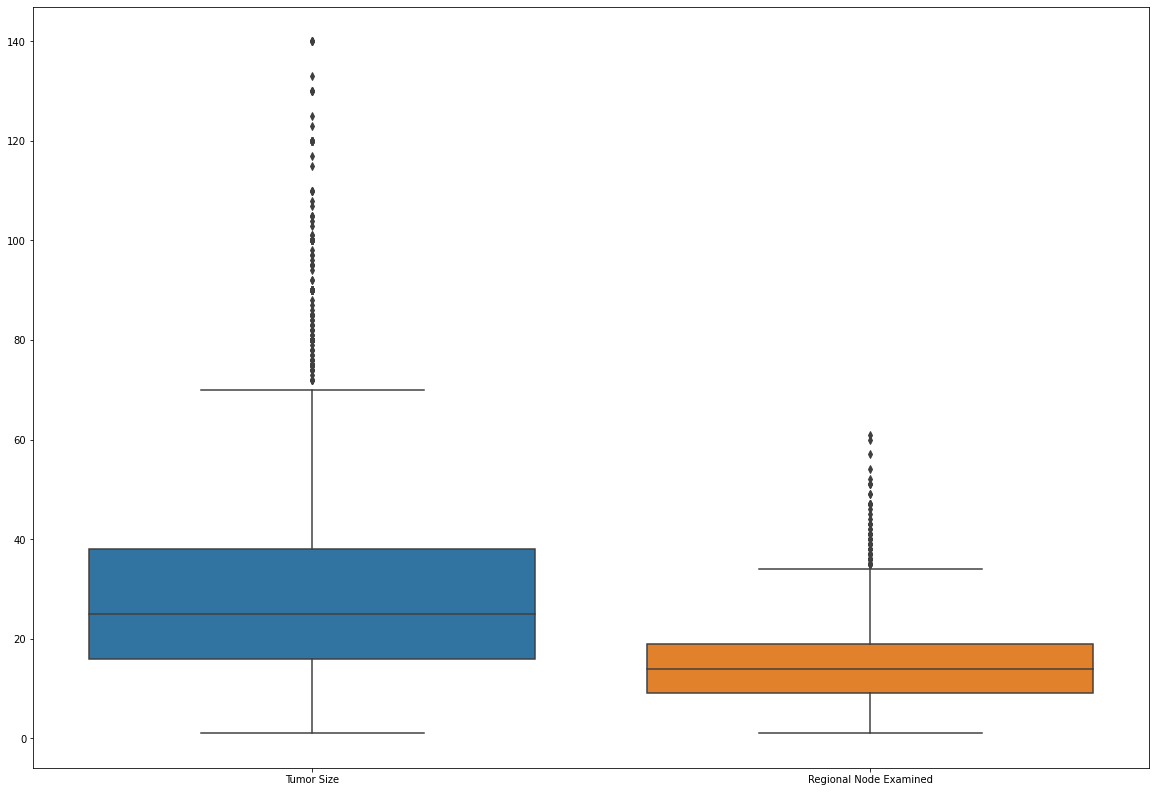

In [299]:
plt.figure(figsize=(20, 14))
sns.boxplot(data=data[['Tumor Size', 'Regional Node Examined']])

<AxesSubplot:>

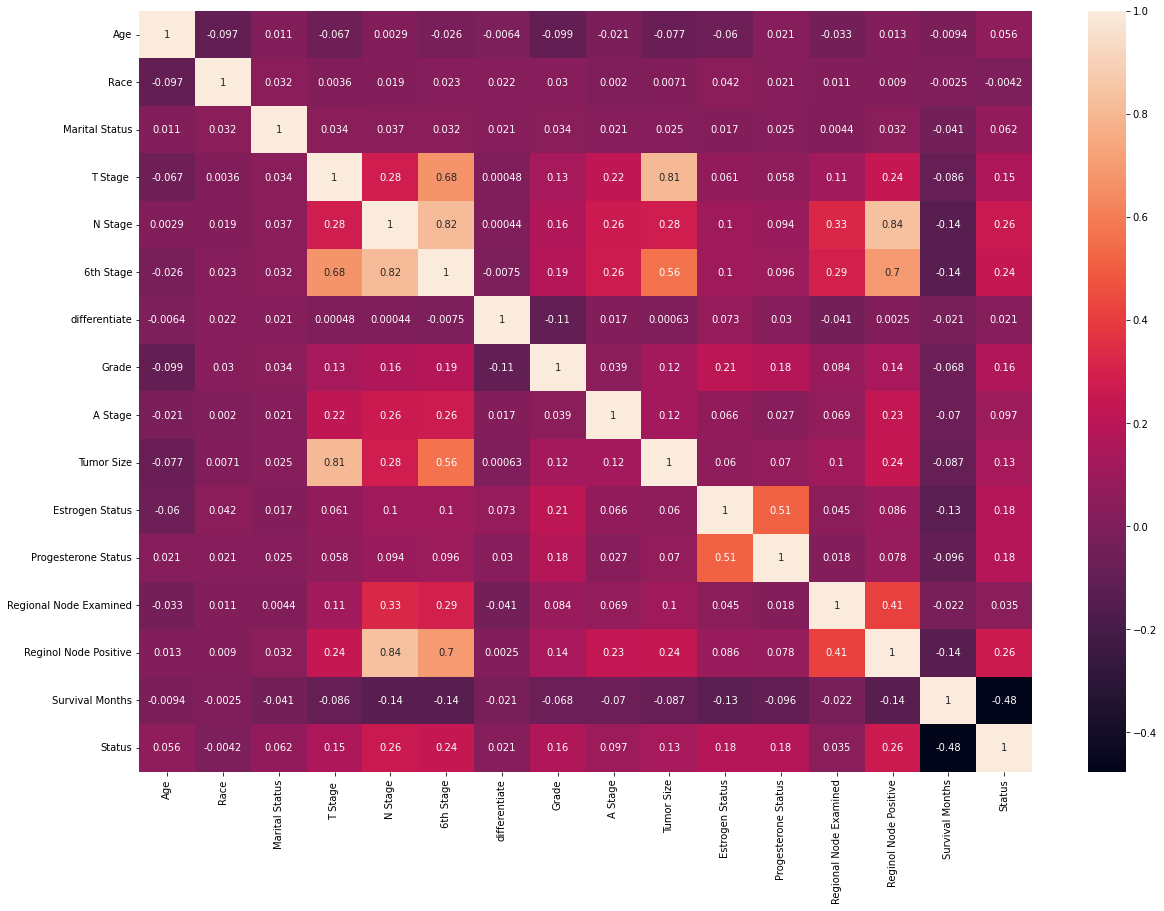

In [300]:
plt.figure(figsize = (20, 14))
sns.heatmap(data.corr(), annot=True)

In [301]:
data.corr()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Age,1.000000,-0.097035,0.010792,-0.066914,0.002883,-0.025841,-0.006435,-0.099294,-0.020860,-0.077215,-0.059787,0.021269,-0.033345,0.012586,-0.009390,0.055921
Race,-0.097035,1.000000,0.032398,0.003557,0.019066,0.022911,0.022343,0.030054,0.002047,0.007077,0.042452,0.020930,0.011342,0.009039,-0.002474,-0.004184
Marital Status,0.010792,0.032398,1.000000,0.033808,0.036525,0.032354,0.021349,0.034080,0.021425,0.024570,0.016682,0.024652,0.004351,0.032473,-0.041208,0.062272
T Stage,-0.066914,0.003557,0.033808,1.000000,0.277015,0.675088,0.000475,0.131470,0.221124,0.809176,0.060954,0.057633,0.114102,0.243075,-0.085718,0.154699
N Stage,0.002883,0.019066,0.036525,0.277015,1.000000,0.820819,0.000444,0.162501,0.260573,0.277905,0.101995,0.093723,0.328276,0.838073,-0.139577,0.255772
6th Stage,-0.025841,0.022911,0.032354,0.675088,0.820819,1.000000,-0.007454,0.185577,0.264373,0.562229,0.100552,0.096183,0.294702,0.695027,-0.136767,0.241840
differentiate,-0.006435,0.022343,0.021349,0.000475,0.000444,-0.007454,1.000000,-0.105773,0.016824,0.000628,0.073242,0.030258,-0.040787,0.002488,-0.021197,0.021468
Grade,-0.099294,0.030054,0.034080,0.131470,0.162501,0.185577,-0.105773,1.000000,0.039459,0.119367,0.211251,0.179860,0.084416,0.135319,-0.067669,0.161398
A Stage,-0.020860,0.002047,0.021425,0.221124,0.260573,0.264373,0.016824,0.039459,1.000000,0.123883,0.065570,0.026530,0.069010,0.232849,-0.070109,0.096584
Tumor Size,-0.077215,0.007077,0.024570,0.809176,0.277905,0.562229,0.000628,0.119367,0.123883,1.000000,0.059585,0.069879,0.104352,0.242322,-0.086901,0.134205


In [302]:
# data.drop(['Survival Months'], axis=1, inplace=True) # Un-comment this and watch the accuracy drop!

In [303]:
X = data.drop("Status", axis=1)
y = data['Status']

In [304]:
X.shape, y.shape

((4024, 15), (4024,))

## Data Transformation

In [305]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Data Splitting

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [307]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3018, 15), (3018,), (1006, 15), (1006,))

## Model Definition

In [308]:
model = LogisticRegression(n_jobs=-1)

In [309]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

## Model Evaluation

In [310]:
model.score(X_test, y_test)

0.9065606361829026

In [311]:
y_pred = model.predict(X_test)

In [312]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       863
           1       0.80      0.45      0.58       143

    accuracy                           0.91      1006
   macro avg       0.86      0.72      0.76      1006
weighted avg       0.90      0.91      0.90      1006



In [313]:
accuracy_score(y_test, y_pred)

0.9065606361829026

In [314]:
1 - accuracy_score(y_test, y_pred)

0.09343936381709739

In [315]:
precision_score(y_test, y_pred)

0.8024691358024691

In [316]:
recall_score(y_test, y_pred)

0.45454545454545453

In [317]:
f1_score(y_test, y_pred)

0.5803571428571428

In [318]:
cm = confusion_matrix(y_test, y_pred)

In [319]:
cm

array([[847,  16],
       [ 78,  65]], dtype=int64)

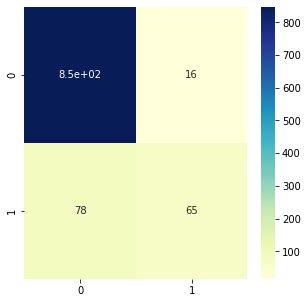

In [320]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

## Extra Techniques for classification.

### 1. With SVM

In [321]:
from sklearn.svm import SVC
model_2 = SVC(kernel='rbf')
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.9025844930417495

In [322]:
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       863
           1       0.82      0.41      0.54       143

    accuracy                           0.90      1006
   macro avg       0.86      0.70      0.74      1006
weighted avg       0.90      0.90      0.89      1006



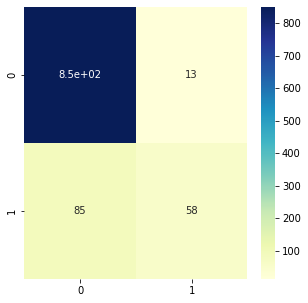

In [323]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

### 2. With Naive Bayes

In [324]:
from sklearn.naive_bayes import GaussianNB

model_3 = GaussianNB()
model_3.fit(X_train, y_train)
model_3.score(X_test, y_test)

0.8330019880715706

In [325]:
y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       863
           1       0.42      0.48      0.45       143

    accuracy                           0.83      1006
   macro avg       0.67      0.68      0.67      1006
weighted avg       0.84      0.83      0.84      1006



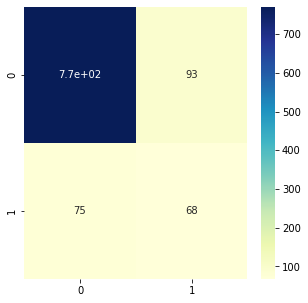

In [326]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()